# Sales Prediction Using Python

In this project We'll use linear regression and other machine learning techniques to predict sales accurately by considering the marketting techniques which are advertising on tv, radio and newspapers.
The dataset is taken from https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [33]:
df=pd.read_csv("advertising.csv")

## Inspecting and cleaning the dataset

In [6]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.shape

(200, 4)

### Checking if outliers are present

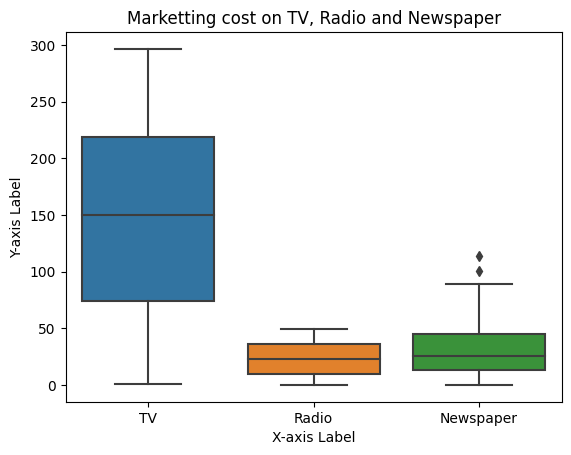

In [28]:
sns.boxplot(df[["TV","Radio","Newspaper"]])
plt.title('Marketting cost on TV, Radio and Newspaper')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


Here, we can see 2 outliers in Newspaper column. Let's remove it

In [36]:
def remove_outliers(Newspaper):
    Q1 = df["Newspaper"].quantile(0.25)
    Q3 = df["Newspaper"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df["Newspaper"] >= lower_bound) & (df["Newspaper"] <= upper_bound)]

# Remove outliers from 
df = remove_outliers(df["Newspaper"])

In [37]:
df.shape

(198, 4)

<AxesSubplot:>

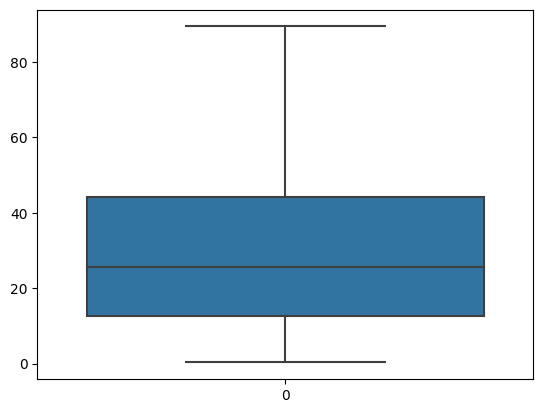

In [38]:
sns.boxplot(df["Newspaper"])

Let's visualise each columns in the dataset

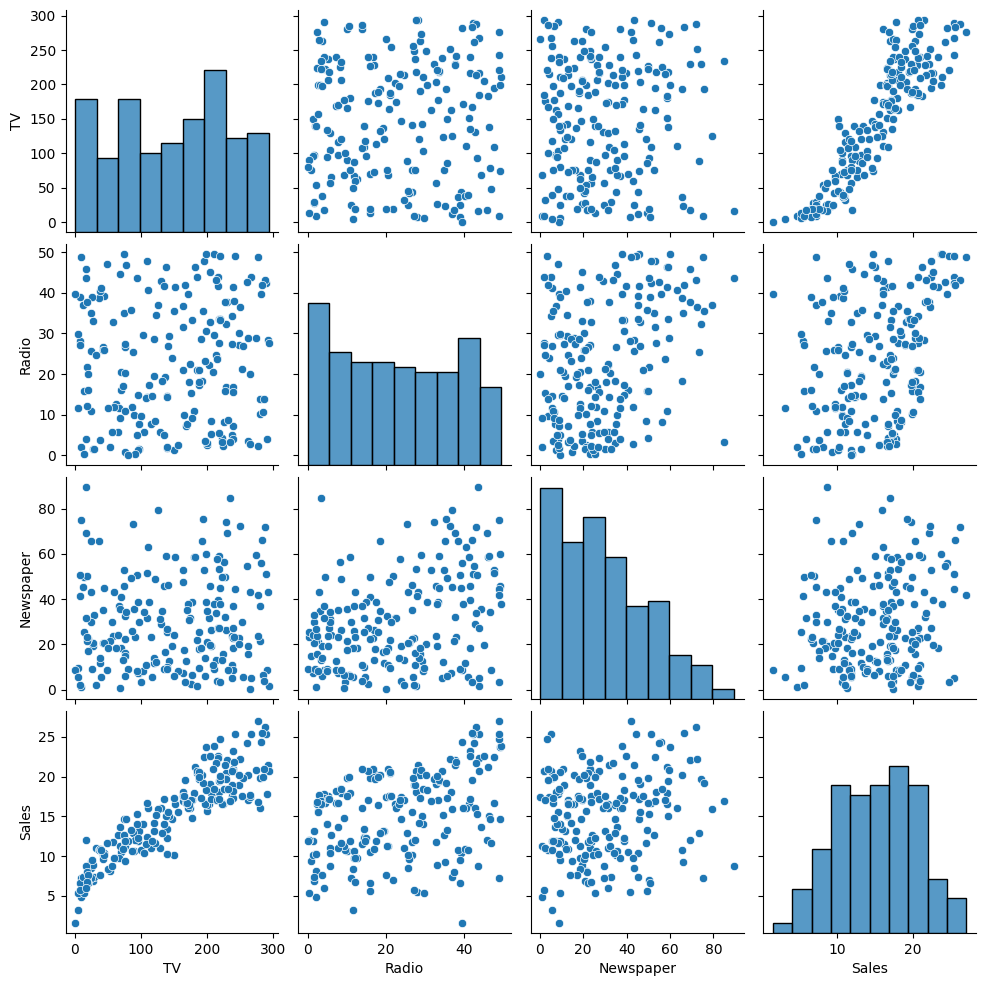

In [39]:
sns.pairplot(df)

here, we can see TV ans sales has linear correlation.

Lets visualize with regression line on each columns with Sales(Targer variable)

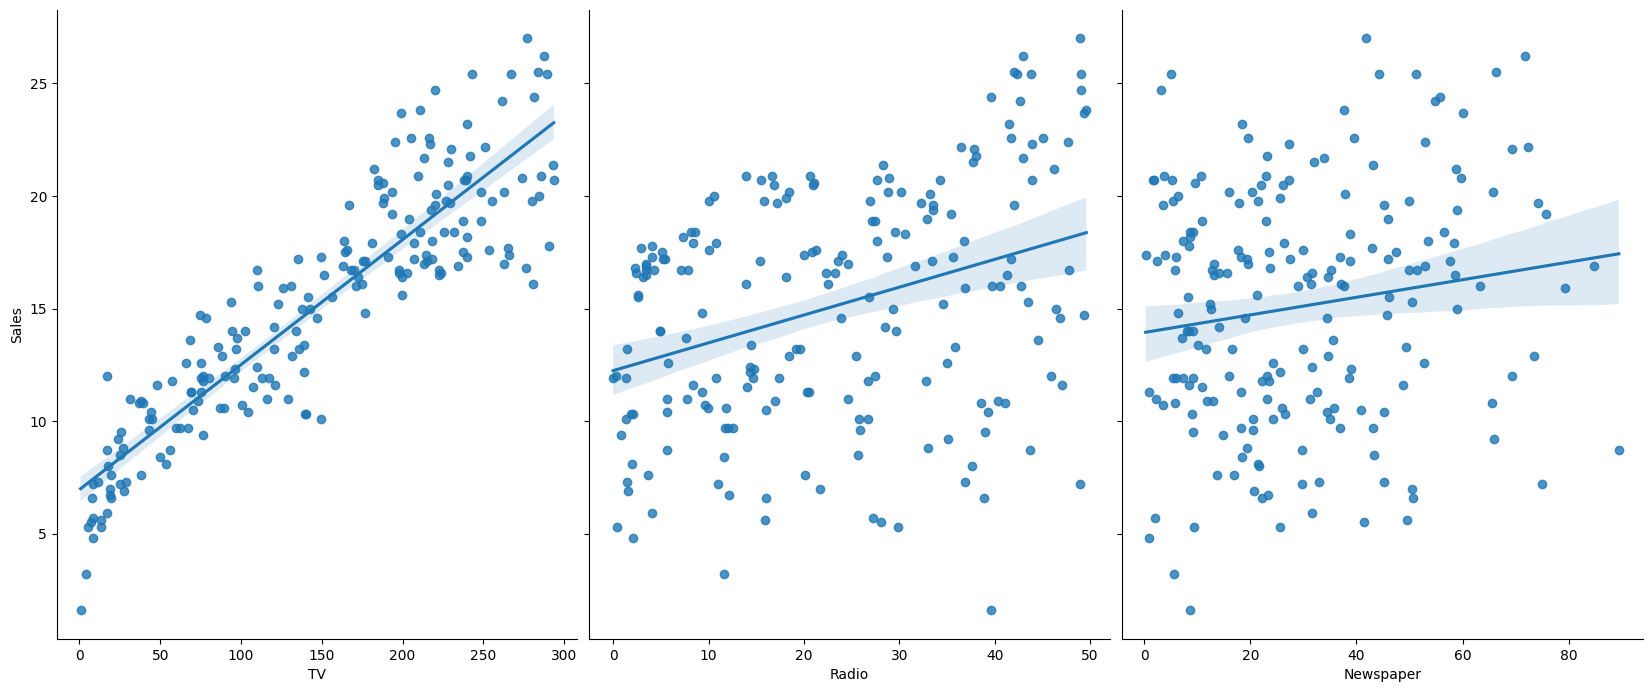

In [58]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.8, kind='reg')

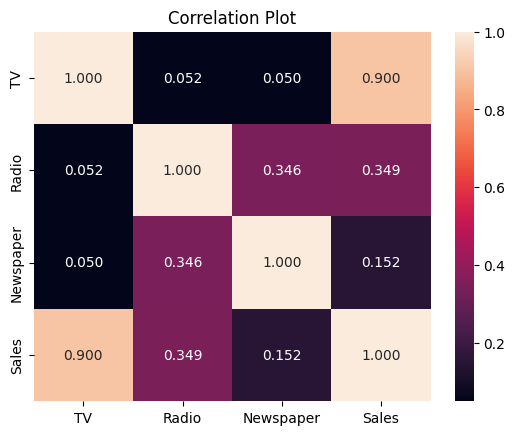

In [55]:
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Plot")
plt.show()

here we can see, some positive correlation between the each columns tv,radio and newspaper  with sales. Where correaltion value
are 0.900, 0.349, 0.152 respectively. here we can see that Newspaper is least affecting factors in sales.

## Preparing Model

In [61]:
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

In [62]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [63]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [68]:
X_train.head(5)

,TV,Radio,Newspaper
194,149.7,35.6,6.0
39,228.0,37.7,32.0
149,44.7,25.8,20.6
119,19.4,16.0,22.3
44,25.1,25.7,43.3


## 1.Linear Regression model

In [69]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [73]:
#Getting the y-intercept and coefficients for tv, radio and newspaper respectively
print(linReg.intercept_)
print(linReg.coef_)

4.440253698439477
[0.05520677 0.10551514 0.00411441]


In [74]:
y_pred=linReg.predict(X_test)

In [75]:
print(y_pred)

[22.13935354 22.84536537 10.98145709 23.77413859 21.28033209 17.37685279
 23.2190512  17.13089035  6.99633731 15.99955852 21.42369597 12.49614166
 16.48551271 13.19193176 17.00745048 17.19192041 23.57913771  8.26650862
 15.09558888 23.81707673 13.70249375 10.00690158 13.39412338 18.18115754
 12.47262367 13.73923194 12.40981156 21.41652169 15.83213187 18.22922948
 13.83747907  7.78264267 18.84196896 20.95644729 18.50145589  9.77261506
 15.94002252 15.74269014  9.78133564 19.63732583 12.42327246 16.4930422
 14.71006038 14.53889628 12.66787806 22.04732823  9.28442014 19.4036484
  9.17409011  9.51952424 19.39904263  9.23451484 15.25886225 12.20697219
 11.56705676 17.0735421  10.38882368 13.7948229  16.95432106 18.10262828]


Evaluating the model
Using RMSE:Root Mean Squared Error and R2_score

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean squared error: 2.64
R2 score : 0.87
